In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [72]:
''' Drawing parabola given focus and diectrix values in any direction'''
def focus_directrix(focus, directrix, vertical = True):

    a = focus[0];
    b = focus[1];    
    
    n= 150;
    
    if vertical :
        k =  (b + directrix)/2;
        p =  (b - directrix)*2;
        x = np.linspace(-2*20,2*18,n)
        y = np.array([(1/p)*(x1-a)**2 + k for x1 in x])
        ## plot focul length
        fx = np.linspace(k-10,k+10,n)
        fy = np.array([directrix]*n)
        plt.plot(x,fy,'lime')
    else :
        k =  (a + directrix)/2;
        p =  (a - directrix)*2;
        y = np.linspace(-2*20,2*18,n)
        x = np.array([(1/p)*(y1-b)**2 + k for y1 in y])
        ## plot focul length
        fy = np.linspace(k-10,k+10,n)
        fx = np.array([directrix]*n)
        plt.plot(fx,y,'lime')
        
    plt.plot(x, y,'crimson')
    
    

In [73]:
''' Drawing rotated parabola given focus and diectrix values in any direction'''
def rotated_parabole(focus, vertex):

    distance = math.sqrt(pow(vx - fx, 2) + pow(vy - fy, 2))

    phi = np.arctan2(abs(vy- fy),abs(vx- fx))
    
    if fx < vx and fy > vy:
        theta = phi
    elif fx < vx and fy < vy:
        theta = np.pi - phi
    elif fx > vx and fy > vy:
        theta = -phi
    elif fx > vx and fy < vy:
        theta = phi - np.pi
    
    print('angle is {}'.format(theta*180/np.pi))
    
    t = np.linspace(-15, 15, 1000)
    t_2 = ((t - vx) * (t - vx)/(4*distance) + vy)
    y_original = ((t - vx) * (t - vx)/(4*distance) + vy)
    x_5 = t * np.cos(theta) - t_2 * np.sin(theta)
    y_5 = t * np.sin(theta) + t_2 * np.cos(theta)
    plt.plot(t, y_original)
    plt.plot(x_5, y_5)

In [74]:
''' Drawing parabola given focus and diectrix values in any direction'''
def focus_vertex(focus, vertex):

    fx = focus[0];
    fy = focus[1];
    
    vx = vertex[0]
    vy = vertex[1]
    
    if vx == fx and vy == fy:
        print('Both vertex and Focus cannot be same')
        return False
    
    distance = math.sqrt(pow(vx - fx, 2) + pow(vy - fy, 2))

    x = np.linspace(-15, 15, 1000)
    y = np.linspace(-15, 15, 1000)
    if vx == fx and vy < fy:
        y = (x - vx) * (x - vx)/(4*distance) + vy
    elif vx == fx and vy > fy:
        y = - (x - vx) * (x - vx)/(4*distance) + vy
    elif vy == fy and vx < fx:
        x = (y - vy) * (y - vy)/(4*distance) + vx
    elif vy == fy and vx > fx:
        x = - (y - vy) * (y - vy)/(4*distance) + vx
    else :
        rotated_parabole(focus, vertex)
        return True
    
    plt.plot(x, y)


# Ref : https://www.youtube.com/watch?v=Xuj8gY6He5w

In [75]:
''' Drawing ellipse given foci and major axis distance in any direction'''
def draw_ellipse(focus1, focus2, distance):

    a1 = focus1[0];
    b1 = focus1[1];
    
    a2 = focus2[0]
    b2 = focus2[1]
    
    a = distance/2
        
    h = (a1 + a2) / 2
    k = (b1 + b2) / 2
    f = np.sqrt((a1 - h)**2 + (b1 - k)**2)

    if a**2 - f**2 < 0:
        print("please input a valid major-axis distance value")
        return False
    b = np.sqrt(a**2 - f**2)

    phi = np.arctan2((b2 - b1), (a2 - a1))
    t = np.linspace(0, 2*np.pi, 1000)
    x = h + a * np.cos(t) * np.cos(phi) - b * np.sin(t) * np.sin(phi)
    y = k + a * np.cos(t) * np.sin(phi) + b * np.sin(t) * np.cos(phi)
    # Plot ellipse
    plt.plot(x, y)
    # Show foci
    point_x, point_y = [[a1, a2]], [[b1, b2]]
    for i in range(len(point_x)):
        plt.plot(point_x[i], point_y[i], linewidth=1.0, linestyle='--')
        plt.scatter(point_x[i], point_y[i], color='black')


In [76]:
def ellipse(num, foci):
    if num != len(foci) :
        print("please pass {} sets of focus" .format(num))
        return False
    
    for i in range(0, num):
        a1 = foci[i][0]
        b1 = foci[i][1]
        a2 = foci[i][2]
        b2 = foci[i][3]
        distance = foci[i][4]
        draw_ellipse([a1, b1], [a2, b2], distance)

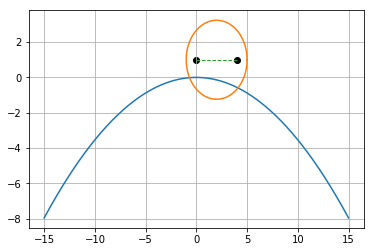

In [78]:
if __name__ == '__main__':    
    
    plt.grid()    
    
    focus = [0, -math.sqrt(50)]
    vertex = [0, 0]
    directrix = 2
    vertical = False
    if focus == None :
        print("Need to assign focus values, Focus is a required parameter")
    elif vertex != None :
        focus_vertex(focus, vertex)
    elif directrix != None :
        focus_directrix(focus, directrix, vertical)
        
    # number of ellipses
    num = 1
    # array of focus along with major axis distance ex : [[a1, b1, a2, b2, distance]]
    foci_points = [[0,1,4,1,6]]
    ellipse(1, [[0,1,4,1,6]])